In [1]:
import os
import sys
import time as t_util
import numpy as np
import pandas as pd
import cftime
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib
import yaml


In [2]:
#Read main path
with open('../path_main.txt', 'r') as file:    path_main = file.read()

dir_data_HSIchg = f'{path_main}Data/Plot_preparation/HSI_changes/'
dir_data_ThrExc = f'{path_main}Data/Plot_preparation/Threshold_Exceedance/'
dir_data_HWMId  = f'{path_main}Data/Plot_preparation/HWMId/'
dir_scripts     = f'{path_main}Scripts/'
dir_names       = f'{path_main}Scripts/Model_lists/'
dir_fig         = f'{path_main}Figures/Paper_v2/'
dir_repo        = f'{path_main}Data/RepositoryPublication/'
if not os.path.exists(dir_fig): os.mkdir(dir_fig)
    

## Prepare variables and parameters

In [3]:
#Define cities
cities = ['Lisbon', 'Madrid', 'Barcelona', 'Rome', 'Athens', 'Istanbul', 'Sofia', 'Bucharest', 'Belgrade',
          'Zagreb', 'Milan', 'Budapest', 'Munich', 'Vienna', 'Prague', 'Paris', 'Brussels', 'Amsterdam',
          'London', 'Dublin', 'Hamburg', 'Copenhagen', 'Berlin', 'Warsaw', 'Kharkiv', 'Kyiv', 'Minsk','Vilnius', 
          'Riga', 'Moscow', 'NizhnyNovgorod', 'Kazan', 'SaintPetersburg', 'Helsinki', 'Stockholm', 'Oslo']

cities = np.array(cities)

#Define HSIs
HSI_names = ['TX']
    
HSI_out = {'TX': 'T'}
    
#Define scenarios and variables
RCP = 'rcp85'

#Define models and RCPs which should be used
all_models = dict()
all_models = []
with open(dir_names + 'Models_CORDEX-EUR-11_RCP85.txt', 'r') as filehandle:
    for line in filehandle:
        all_models.append(eval(line[:-1]))

models = np.array(all_models)
        
#Define warming levels
GWL_levels = ['10', '20', '30']

#Get and sort GCMs an RCMs
# GCMs_list = [model[0] for model in all_models]
GCMs_list = [model[0] + '_' + model[1] for model in all_models]
GCMs_list = [model.split('_')[0] for model in sorted(list(set(GCMs_list)))]
# RCMs_list = [model[1] for model in all_models]
RCMs_list = [model[0] + '_' + model[1] for model in all_models]
RCMs_list = [model.split('_')[1] for model in sorted(list(set(RCMs_list)))]
GCMs = [[x, GCMs_list.count(x), ord(x[0].lower())] for x in set(GCMs_list)]
RCMs = [[x, RCMs_list.count(x), ord(x[0].lower())] for x in set(RCMs_list)]
GCMs = sorted(GCMs, key = lambda x: (x[1], x[2]), reverse=True)
RCMs = sorted(RCMs, key = lambda x: (x[1], x[2]), reverse=True)
GCMs = [GCM[0] for GCM in GCMs]
RCMs = [RCM[0] for RCM in RCMs]

#Define warming levels
EMT_change = '3.0K'#'1.0K', '2.0K', 


In [4]:
RCMs_text = []
for RCM in RCMs:
    if 'COSMO-crCLIM' in RCM or 'REMO2009' in RCM:
        RCMs_text.append('-'.join(RCM.split('-')[2::]))
    else:
        RCMs_text.append('-'.join(RCM.split('-')[1::]))
    
GCMs_text = []
for GCM in GCMs:
    if 'MPI-ESM' in GCM or 'CNRM-CM5' in GCM:
        GCMs_text.append('-'.join(GCM.split('-')[2::]))
    else:
        GCMs_text.append('-'.join(GCM.split('-')[1::]))    


## Plot preparation

In [5]:
#Titles 1
tit_chg = dict()
tit_chg['JJA_mean'] = ' (JJA mean)'
tit_chg['Q90']      = ' (JJA, Q90)'
tit_chg['Ymax']     = 'x change'

#Titles 2
titles = dict()
titles['HSI-changes'] = lambda HSI, THR_level : HSI +  tit_chg[t_method]
titles['Threshold-Exceedance'] = lambda HSI, THR_level: 'Exceedance ' + HSI + '>' + THR_levels_vals[HSI + '_' + THR_level] + '°C'
titles['HWMId'] = lambda HSI, THR_level : 'HWMId-' + HSI

#Units
units = dict()
units['HSI-changes'] = '°C'
units['Threshold-Exceedance'] = 'd/y'
units['HWMId'] = ''

#Set edgecolor
edgecolor = 'none'

THR_levels = dict()
THR_levels['TN'] = 2 # 20 °C
THR_levels['TX'] = 3 # 30 °C

THR_levels_vals = dict()
THR_levels_vals['TN_Level2'] = '20'
THR_levels_vals['TX_Level3'] = '30'

#Define colormap
cmap   = matplotlib.cm.get_cmap('Reds', len(models))
colors = cmap(np.linspace(0, 0.9,  len(models)))


## Plot

93.4965134427396
93.4965134427396
HSI-changes
RCM variance share: 62.7% - 68.8%
GCM variance share: 24.7% - 32.2%
Mean fraction RCM/GCM share = 2.3

92.32487524349565
92.32487524349565
Threshold-Exceedance
RCM variance share: 62.5% - 63.1%
GCM variance share: 25.4% - 29.8%
Mean fraction RCM/GCM share = 2.3

93.02037017874179
93.02037017874179
HWMId
RCM variance share: 49.4% - 57.5%
GCM variance share: 35.6% - 45.8%
Mean fraction RCM/GCM share = 1.3



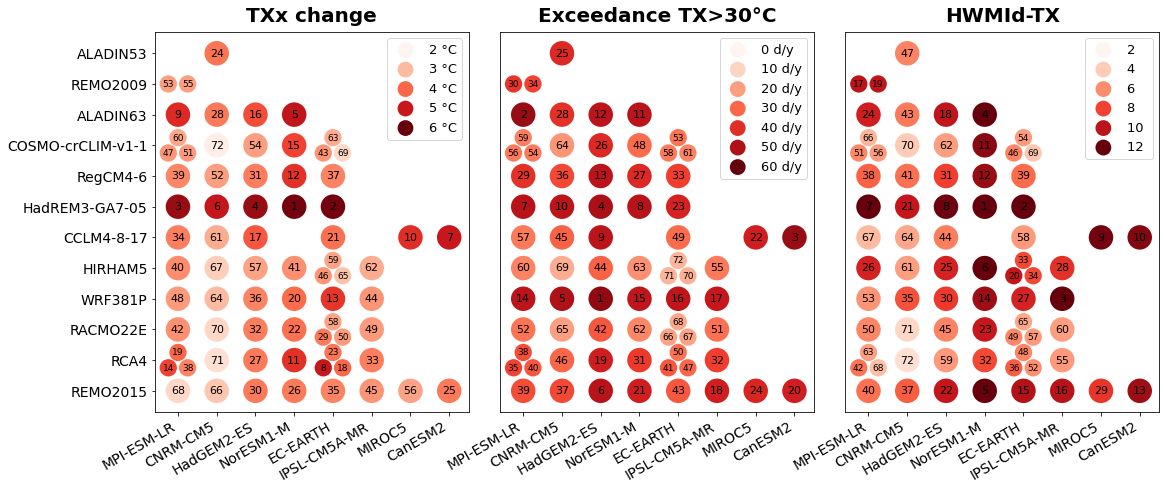

In [27]:
#Create figure
fig, axes = plt.subplots(1, 3, figsize=(18, 7))
plt.subplots_adjust(wspace=0.10)
p_all = []

HSI = 'TX'

out_name = '_3x3'
out_name = ''

#Select methods to show in plot
methods= ['HSI-changes', 'Threshold-Exceedance', 'HWMId']

#Select which time method to use for HSI changes ('JJA_mean', 'Q90', 'Ymax')
t_method = 'Ymax'

#Read data for HSI change
data_HSIchg = xr.open_dataset(dir_data_HSIchg + 'EURO-CORDEX' + out_name + '/HSIs-changes_rcp85_EMT.nc')
models      = data_HSIchg.model
data_HSIchg = data_HSIchg.sel(city=cities, EMT_change=EMT_change, t_method=t_method)[HSI]
data_HSIchg_val = data_HSIchg.values

#Read data for threshold exceedance
THR_level = 'Level' + str(THR_levels[HSI])
data_ThrExc = xr.open_dataset(dir_data_ThrExc + 'EURO-CORDEX' + out_name + '/HSIs-ThresholdExceedance_rcp85_EMT.nc')
data_ThrExc = data_ThrExc.sel(city=cities, EMT_change=EMT_change, THR_level=THR_level, transformation='no_trans')[HSI]
data_ThrExc_val = data_ThrExc.values

#Read data for HWMId
data_HWMId = xr.open_dataset(dir_data_HWMId + 'EURO-CORDEX' + out_name + '/HWMId-' + HSI + '_' + RCP + '_EMT.nc')
data_HWMId = data_HWMId.sel(city=cities, EMT_change=EMT_change, quantile='Q50').HWMID
data_HWMId_val = data_HWMId.values

#Save data in dict for plotting
data_plot = dict()
data_plot['HSI-changes']          = data_HSIchg
data_plot['Threshold-Exceedance'] = data_ThrExc
data_plot['HWMId']                = data_HWMId

#Calculate average across cities
data_HSIchg_val = np.mean(data_HSIchg_val, axis=1)
data_ThrExc_val = np.mean(data_ThrExc_val, axis=1)
data_HWMId_val  = np.mean(data_HWMId_val, axis=1)            

#Sort values
data_HSIchg_rank = np.argsort(data_HSIchg_val)
data_ThrExc_rank = np.argsort(data_ThrExc_val)
data_HWMId_rank  = np.argsort(data_HWMId_val)

#Create empty arrays
ranking_HSIchg = np.empty(data_HSIchg_rank.shape) * np.NaN
ranking_ThrExc = np.empty(data_ThrExc_rank.shape) * np.NaN
ranking_HWMId  = np.empty(data_HWMId_rank.shape)  * np.NaN

#Loop over models and get ranking of each model
ranking_HSIchg[data_HSIchg_rank] = np.arange(1, len(models) + 1)
ranking_ThrExc[data_ThrExc_rank] = np.arange(1, len(models) + 1)
ranking_HWMId[data_HWMId_rank]   = np.arange(1, len(models) + 1)

#Save ranking in array
ranking = dict()
ranking['HSI-changes']          = ranking_HSIchg
ranking['Threshold-Exceedance'] = ranking_ThrExc
ranking['HWMId']                = ranking_HWMId

#Save values in array
values_all = dict()
values_all['HSI-changes']          = data_HSIchg_val
values_all['Threshold-Exceedance'] = data_ThrExc_val
values_all['HWMId']                = data_HWMId_val

#Collect data for saving in excel
data_coll_out = dict()
data_coll_out['HSI-changes']          = data_HSIchg
data_coll_out['Threshold-Exceedance'] = data_ThrExc
data_coll_out['HWMId']                = data_HWMId

#Loop over methods
for i0, method in enumerate(methods):

    ax = axes[i0]
    
    #Define min and max for plots and vector for legend
    if method=='HSI-changes':
        vmin = 2
        vmax = 6
        range_leg = range(2, 7)
    elif method=='Threshold-Exceedance':
        vmin = 0
        vmax = 60
        range_leg = range(0, 70, 10)
    elif method=='HWMId':
        vmin = 2
        vmax = 12
        range_leg = range(2, 14, 2)
    
    #Loop over GCMs and RCMs
    data_coll = np.zeros((len(GCMs), len(RCMs))) * np.NaN
    for i1, GCM in enumerate(GCMs):
        for i2, RCM in enumerate(RCMs):
        
            #Select GCM-RCM combination
            ind = [ind for ind, model in enumerate(all_models) if model[0]==GCM and model[1]==RCM]

            #Skip if GCM-RCM combination does not exist
            if len(ind)==0:
                continue
                
            #Model with one ensemble member
            elif len(ind)==1:
                
                #Get ranks and values
                rank  = len(models) - ranking[method][ind[0]] + 1
                value = values_all[method][ind[0]]
                
                #Plot
                ax.scatter(i1, i2, s=600, color=cmap((value-vmin)/(vmax-vmin)), edgecolor=edgecolor, vmax=vmax, vmin=vmin)
                ax.text(i1, i2, "{:.0f}".format(rank), ha='center', va='center', fontsize=11)
                
                #Get value for calculating share of RCMs and GCMs on total variance
                value_coll = value
            
            #Model with two ensemble members
            elif len(ind)==2:
                
                #Get ranks and values
                ranks = len(models) - ranking[method][ind] + 1
                values = values_all[method][ind]
                
                #Plot
                ax.scatter(i1-0.25, i2, s=300, color=cmap((values[0]-vmin)/(vmax-vmin)), edgecolor=edgecolor, vmax=vmax, vmin=vmin)
                ax.scatter(i1+0.25, i2, s=300, color=cmap((values[1]-vmin)/(vmax-vmin)), edgecolor=edgecolor, vmax=vmax, vmin=vmin)
                ax.text(i1-0.25, i2, "{:.0f}".format(ranks[0]), ha='center', va='center', fontsize=9)
                ax.text(i1+0.25, i2, "{:.0f}".format(ranks[1]), ha='center', va='center', fontsize=9)
                
                #Get value for calculating share of RCMs and GCMs on total variance
                value_coll = np.mean(values)
            
            #Model with three ensemble members
            elif len(ind)==3:
                
                #Get ranks and values
                ranks = len(models) - ranking[method][ind] + 1
                values = values_all[method][ind]
                
                #Plot
                ax.scatter(i1-0.25, i2-0.25, s=300, color=cmap((values[0]-vmin)/(vmax-vmin)), edgecolor=edgecolor, vmax=vmax, vmin=vmin)
                ax.scatter(i1+0.25, i2-0.25, s=300, color=cmap((values[1]-vmin)/(vmax-vmin)), edgecolor=edgecolor, vmax=vmax, vmin=vmin)
                ax.scatter(i1+0.00, i2+0.25, s=300, color=cmap((values[2]-vmin)/(vmax-vmin)), edgecolor=edgecolor, vmax=vmax, vmin=vmin)
                ax.text(i1-0.25, i2-0.25, "{:.0f}".format(ranks[0]), ha='center', va='center', fontsize=9)
                ax.text(i1+0.25, i2-0.25, "{:.0f}".format(ranks[1]), ha='center', va='center', fontsize=9)
                ax.text(i1+0.00, i2+0.25, "{:.0f}".format(ranks[2]), ha='center', va='center', fontsize=9)
                
                #Get value for calculating share of RCMs and GCMs on total variance
                value_coll = np.mean(values)
            
            #Make sure that all models are covered
            else:
                print(RCM)
                print(GCM)
                print(len(mod_sel))
        
            #Save value in array
            data_coll[i1, i2] = value_coll
            
    #Set ticks
    ax.set_xticks(range(0, len(GCMs)))
    ax.set_xticklabels(GCMs_text, rotation=30, ha='right')
    if i0==0:
        ax.set_yticks(range(0, len(RCMs)))
        ax.set_yticklabels(RCMs_text)
    else:
        ax.set_yticks([])

    #Set title and tick sizes
    ax.set_title(titles[method](HSI, THR_level), fontsize=20, fontweight='bold', pad=10)
    ax.tick_params(labelsize=14)
    
    #Create helper plot for legend
    N = vmax - vmin
    for i4 in range_leg:
        sc_h = ax.scatter(-2, 0, s=250, color=cmap((i4-vmin)/N), edgecolor=edgecolor, label=str(i4) + ' ' + units[method])
    
    #Set limits
    ax.set_xlim([-0.6, len(GCMs) - 0.5])
    ax.set_ylim([-0.7, len(RCMs) - 0.3])
    
    #Legend
    ax.legend(fontsize=13, loc='upper right')


    #Calculate share of RCMs and GCMs on total variance (method 1)
    GCM_mean  = np.nanmean(data_coll, axis=1)
    data_anom = data_coll - np.nanmean(data_coll, axis=1, keepdims=True)
    var_ALL = np.nanvar(data_coll)
    var_GCM = np.nanvar(GCM_mean)
    var_RCM = np.nanmean(np.nanvar(data_anom, axis=1))
    RCM_share1 = 100 * var_RCM/var_ALL #100 * var_RCM/(var_RCM + var_GCM) #
    GCM_share1 = 100 * var_GCM/var_ALL #100 * var_GCM/(var_RCM + var_GCM) #
    print(RCM_share1 + GCM_share1)

    #Calculate share of RCMs and GCMs on total variance (method 2)
    RCM_mean = np.nanmean(data_coll, axis=0)
    data_anom = data_coll - np.nanmean(data_coll, axis=0, keepdims=True)
    var_ALL = np.nanvar(data_coll)
    var_RCM = np.var(RCM_mean)
    var_GCM = np.nanmean(np.nanvar(data_anom, axis=0))
    RCM_share2 = 100 * var_RCM/var_ALL #100 * var_RCM/(var_RCM + var_GCM) #
    GCM_share2 = 100 * var_GCM/var_ALL #100 * var_GCM/(var_RCM + var_GCM) #
    print(RCM_share1 + GCM_share1)
    
    #Print values
    print(method)
    print('RCM variance share: ' + '{:.1f}'.format(np.min([RCM_share1, RCM_share2])) + '% - ' + '{:.1f}'.format(np.max([RCM_share1, RCM_share2])) + '%')
    print('GCM variance share: ' + '{:.1f}'.format(np.min([GCM_share1, GCM_share2])) + '% - ' + '{:.1f}'.format(np.max([GCM_share1, GCM_share2])) + '%')
    print('Mean fraction RCM/GCM share = ' + '{:.1f}'.format(np.mean([RCM_share1, RCM_share2])/np.mean([GCM_share1, GCM_share2])))
    print('')
    
    
#Save figure
if out_name=='':  fig_name = 'Fig8'
else:             fig_name = 'FigSx'
plt.savefig(dir_fig + fig_name + '_GCM-RCM-matrix_' + HSI + out_name + '.png', bbox_inches='tight', dpi=300)


In [25]:
HSI-changes
RCM variance share: 66.0% - 73.6%
GCM variance share: 26.4% - 34.0%
Mean fraction RCM/GCM share = 2.3

Threshold-Exceedance
RCM variance share: 67.7% - 71.3%
GCM variance share: 28.7% - 32.3%
Mean fraction RCM/GCM share = 2.3

HWMId
RCM variance share: 51.9% - 61.8%
GCM variance share: 38.2% - 48.1%
Mean fraction RCM/GCM share = 1.3

(8,)

## Export data to excel

In [7]:
#Define HSI and threshold level
HSI ='TX'
THR_level = 'Level' + str(THR_levels[HSI])

#Column titles
col_names = dict()
col_names['HSI-changes'] = lambda HSI, THR_level : HSI +  tit_chg[t_method] + ' [°C]'
col_names['Threshold-Exceedance'] = lambda HSI, THR_level: 'Exceedance ' + HSI + '>' + THR_levels_vals[HSI + '_' + THR_level] + '°C [d/y]'
col_names['HWMId'] = lambda HSI, THR_level : 'HWMId-' + HSI

#Define output file name
fname_out = dir_repo + 'Data_Fig8_GCM-RCM-matrix_ambient-heat_DeltaESAT-3C.xlsx'
if os.path.exists(fname_out):  os.remove(fname_out)

#Create excel file
with pd.ExcelWriter(fname_out, mode="w") as writer:

    #Loop over methods
    for method in methods:

        #Get names
        name = titles[method](HSI, THR_level)
        col_name = col_names[method](HSI, THR_level)
        
        #Create data frame for output
        data_out = pd.DataFrame(columns=['GCM', 'RCM', col_name])

        #Loop over GCMs and RCMs
        i = 0
        for i1, GCM in enumerate(GCMs):
            for i2, RCM in enumerate(RCMs):

                #Select GCM-RCM combination
                indices = [ind for ind, model in enumerate(all_models) if model[0]==GCM and model[1]==RCM]

                if len(indices)==0:
                    continue

                #Loop over ensemble members (if there are several)
                for ind in indices:

                    #Get data
                    data = data_coll_out[method].mean('city').isel(model=ind)

                    #Get model name
                    mod_name = data.model.item()

                    #Save data in data frame
                    data_out.loc[i, 'GCM']    = GCM
                    data_out.loc[i, 'RCM']    = mod_name[mod_name.find(RCM)::]
                    data_out.loc[i, col_name] = data.item()

                    i = i + 1

        #Save in file
        data_out.to_excel(writer, sheet_name=name, float_format="%.2f")


## Plot average of RCMs or GCMs

HSI-changes
MOHC-HadGEM2-ES          3.955890
MPI-M-MPI-ESM-LR         3.781999
IPSL-IPSL-CM5A-MR        3.464962
CNRM-CERFACS-CNRM-CM5    3.209873
dtype: float64


Threshold-Exceedance
MPI-M-MPI-ESM-LR         36.683228
IPSL-IPSL-CM5A-MR        36.560833
CNRM-CERFACS-CNRM-CM5    33.786869
ICHEC-EC-EARTH           31.303241
dtype: float64


HWMId
ICHEC-EC-EARTH           8.146931
MOHC-HadGEM2-ES          8.052250
MPI-M-MPI-ESM-LR         7.422564
CNRM-CERFACS-CNRM-CM5    5.963966
dtype: float64




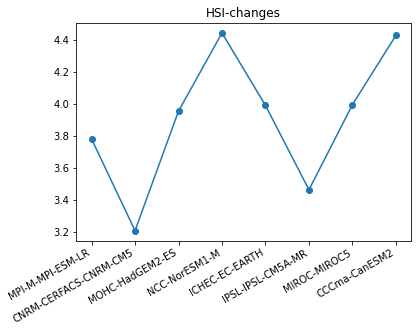

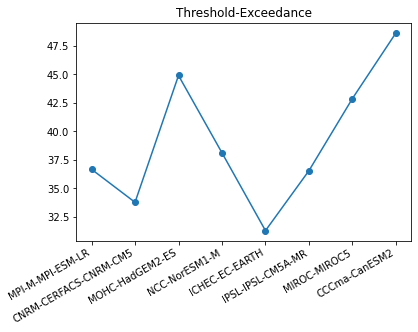

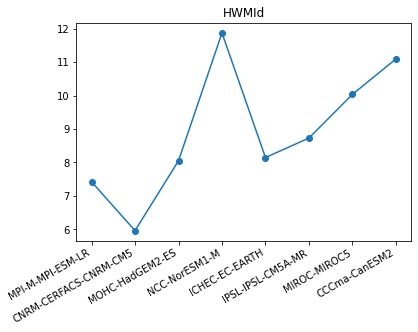

In [8]:
select = 'GCMs'

if select=='RCMs':
    axis = 1
elif select=='GCMs':
    axis = 0

for method in methods:

    print(method)
    
    data_coll2 = pd.DataFrame(np.NaN, index=RCMs, columns=GCMs)

    for i1, RCM in enumerate(RCMs):
        for i2, GCM in enumerate(GCMs):

            values = data_plot[method].mean('city')

            check = [((GCM in mod) and (RCM in mod)) for mod in values.model.values]

            data_coll2.iloc[i1, i2] = values.isel(model=check).mean().item()

    plt.figure()
    plt.plot(data_coll2.mean(axis=axis), 'o-')
    plt.xticks(rotation=30, ha='right');
    plt.title(method)

    print(data_coll2.mean(axis=axis).sort_values(ascending=False)[-4::])
    print('\n')